In [2]:
import numpy as np
import skimage

from isci.graphsearch import *
from isci.precomputing import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
img = skimage.color.rgb2gray(skimage.io.imread('/home/artyom/Desktop/mem.png'))

In [4]:
# precomputed values
grads = get_normalized_grads(*get_grads(img))
lapl_zc = get_lapl_crossing(img)
grad_magn = get_grad_magn(*get_grads(img))
shape = np.array(img.shape)

In [5]:
%%time
# create minimal cost paths from seed point (40, 40)
pointers = path_search((40, 40), shape=shape, lapl_zc=lapl_zc, grads=grads, grad_magn=grad_magn)

CPU times: user 2.17 s, sys: 3.22 ms, total: 2.17 s
Wall time: 2.17 s


In [6]:
# extract path from seed point to point (81, 150)
path = extract_path(pointers, (81, 150))

In [7]:
# visualize path
img_c = img.copy()
for p in path:
    img_c[p] = 2

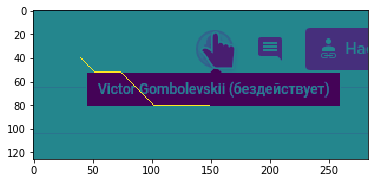

In [8]:
plt.imshow(img_c)